In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('clean_salary_data.csv')

In [161]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,R_yn,sql_yn,tableau_yn,excel_yn,power_bi_yn,spark_yn,aws_yn
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,1,61,1,0,1,0,0,0,0,1
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,1,129,0,0,1,0,1,0,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,1,19,1,0,1,1,1,0,0,0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,0,20,0,0,1,1,0,0,0,1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,...,1,13,1,0,1,0,1,0,0,0


In [162]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'excel_yn', 'power_bi_yn', 'spark_yn',
       'aws_yn'],
      dtype='object')

In [163]:
def title_simplifier(title):
    if 'data analyst' in title.lower():
        return 'data analyst'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [164]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [165]:
df.job_simp.value_counts()

data analyst      1671
analyst            567
data scientist      14
Name: job_simp, dtype: int64

In [166]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        1758
senior     481
jr          13
Name: seniority, dtype: int64

In [167]:

df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts() 

CA          626
TX          394
NY          345
IL          164
PA          114
AZ           97
NC           90
CO           88
NJ           86
WA           53
VA           48
OH           35
UT           33
FL           27
IN           23
DE           11
Arapahoe      8
GA            4
SC            3
KS            3
Name: job_state, dtype: int64

In [168]:
#  Job description length 
df['description_len'] = df['Job Description'].apply(lambda x: len(x))
df['description_len']

0        7057
1        4702
2        4688
3        5249
4        3376
5        2611
6        3143
7        1639
8        3342
9        3468
10       4619
11       5625
12       3242
13       2960
14       3723
15       2401
16       2550
17       3889
18       4149
19       4465
20       3213
21        816
22       2927
23       3479
24       1129
25       1959
26       2951
27       4170
28       3458
29       3588
30       2719
31        255
32        462
33       4384
34       2158
35       2952
36       2896
37       3288
38       4967
39       3747
40       5662
41       2718
42       1795
43       1095
44       5916
45       2432
46       2091
47       4851
48       2197
49       2134
50       5534
51       3274
52       6119
53       3752
54       2910
55       2811
56       6310
57       5231
58       4504
59       2230
60       3809
61       3508
62       6346
63       6506
64       3268
65       3767
66       1651
67       2726
68       1621
69       2307
70       2171
71    

In [169]:
#Competitor count
df['number_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [170]:
df['Competitors']

0                                                      -1
1                                                      -1
2                                                 GoDaddy
3                                                      -1
4                                              DraftKings
5                                                      -1
6                                                      -1
7                        Travelers, Chubb, Crum & Forster
8                        Thomson Reuters, Hearst, Pearson
9                                        Signifyd, Forter
10        NewYork-Presbyterian Hospital, Northwell Health
11                                                     -1
12                                                     -1
13                                                     -1
14                                                     -1
15                                                     -1
16                DoubleClick, Specific Media, Collective
17            

In [171]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [172]:
df[['min_salary','max_salary']]

,min_salary,max_salary
0,37,66
1,37,66
2,37,66
3,37,66
4,37,66
5,37,66
6,37,66
7,37,66
8,37,66
9,37,66


In [173]:
df['company_txt'] = df.company_txt.apply(lambda x: str(x).replace ('\n', ' '))


In [174]:
df['company_txt']

0                              Vera Institute of Justice 
1                     Visiting Nurse Service of New York 
2                                            Squarespace 
3                                               Celerity 
4                                                FanDuel 
5                                                Point72 
6                                              Two Sigma 
7                                GNY Insurance Companies 
8                                                   DMGT 
9                                              Riskified 
10                                    NYU Langone Health 
11                                               BulbHead
12                                    Montefiore Medical 
13                                                 Known 
14                                         Advisor Group 
15                                   CodeGreen Solutions 
16                                             Undertone 
17            

In [175]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,sql_yn,tableau_yn,excel_yn,power_bi_yn,spark_yn,aws_yn,description_len,number_comp
count,2252.000000,2252.000000,2252.0,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.0,2252.000000,2252.000000,2252.000000,2252.0,2252.000000,2252.000000,2252.000000,2252.000000
mean,3.160080,1398.255329,0.0,54.266874,89.979130,72.123002,0.289076,30.565275,0.282860,0.0,0.616341,0.275311,0.600799,0.0,0.039520,0.122114,3119.808171,0.609236
std,1.665393,902.040151,0.0,19.575375,29.315605,23.600734,0.453434,45.060655,0.450489,0.0,0.486384,0.446770,0.489843,0.0,0.194873,0.327490,1858.598883,1.148295
min,-1.000000,-1.000000,0.0,24.000000,38.000000,33.500000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.000000,0.000000
25%,3.100000,-1.000000,0.0,41.000000,70.000000,58.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1760.750000,0.000000
50%,3.600000,1979.000000,0.0,50.000000,87.000000,69.000000,0.000000,18.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,2881.500000,0.000000
75%,4.000000,2002.000000,0.0,64.000000,104.000000,80.500000,1.000000,35.250000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,4118.000000,0.000000
max,5.000000,2019.000000,0.0,113.000000,190.000000,150.000000,1.000000,340.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,18664.000000,4.000000


In [176]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'excel_yn', 'power_bi_yn', 'spark_yn', 'aws_yn',
       'job_simp', 'seniority', 'description_len', 'number_comp'],
      dtype='object')

<AxesSubplot:>

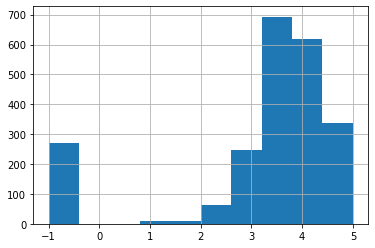

In [177]:
df.Rating.hist()

<AxesSubplot:>

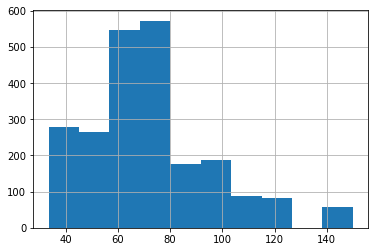

In [178]:
df.avg_salary.hist()

<AxesSubplot:>

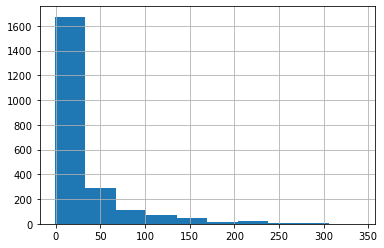

In [179]:
df.age.hist()

<AxesSubplot:>

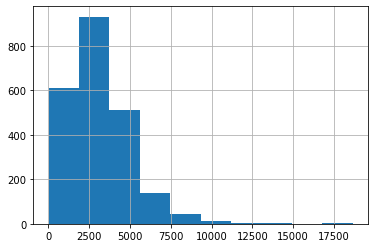

In [180]:
df.description_len.hist()

<AxesSubplot:>

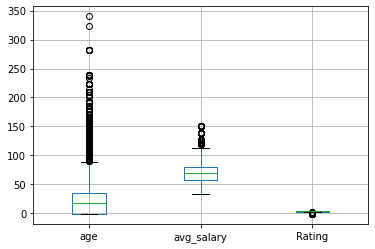

In [181]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

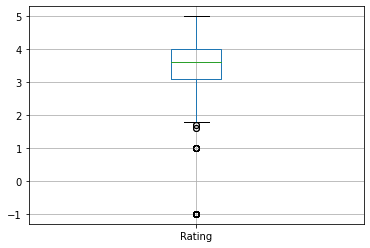

In [182]:
df.boxplot(column = 'Rating')

In [183]:
df[['age','avg_salary','Rating','description_len']].corr()

,age,avg_salary,Rating,description_len
age,1.000000,-0.075298,0.192817,0.255272
avg_salary,-0.075298,1.000000,0.004301,-0.033643
Rating,0.192817,0.004301,1.000000,-0.018666
description_len,0.255272,-0.033643,-0.018666,1.000000


In [184]:
df.isna().mean()

Job Title            0.000000
Salary Estimate      0.000000
Job Description      0.000000
Rating               0.000000
Company Name         0.000444
Location             0.000000
Headquarters         0.000000
Size                 0.000000
Founded              0.000000
Type of ownership    0.000000
Industry             0.000000
Sector               0.000000
Revenue              0.000000
Competitors          0.000000
Easy Apply           0.000000
hourly               0.000000
min_salary           0.000000
max_salary           0.000000
avg_salary           0.000000
company_txt          0.000000
job_state            0.000000
same_state           0.000000
age                  0.000000
python_yn            0.000000
R_yn                 0.000000
sql_yn               0.000000
tableau_yn           0.000000
excel_yn             0.000000
power_bi_yn          0.000000
spark_yn             0.000000
aws_yn               0.000000
job_simp             0.000000
seniority            0.000000
descriptio

<AxesSubplot:>

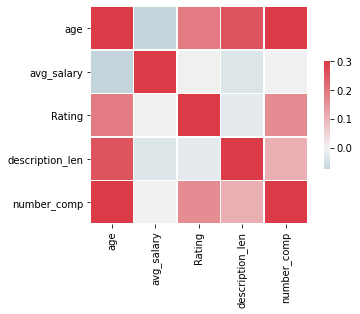

In [185]:
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(df[['age','avg_salary', 'Rating', 'description_len', 'number_comp']].corr(),vmax =.3, center = 0, cmap = cmap, 
           square = True, linewidths =.5, cbar_kws = {"shrink": .5})





In [186]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'excel_yn', 'power_bi_yn', 'spark_yn', 'aws_yn',
       'job_simp', 'seniority', 'description_len', 'number_comp'],
      dtype='object')

In [187]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'excel_yn', 'power_bi_yn', 'spark_yn',
       'aws_yn', 'job_simp', 'seniority']]

graph for Location: total = 253


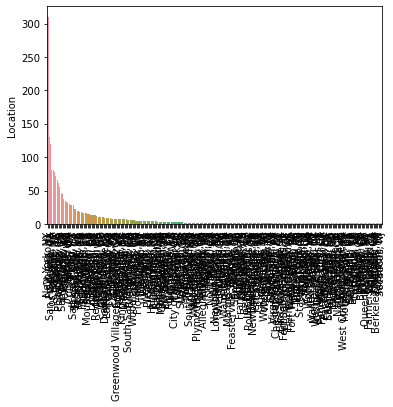

graph for Headquarters: total = 483


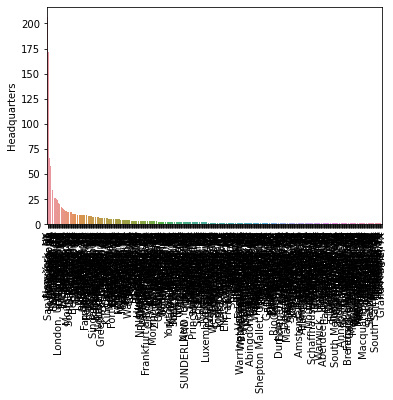

graph for Size: total = 9


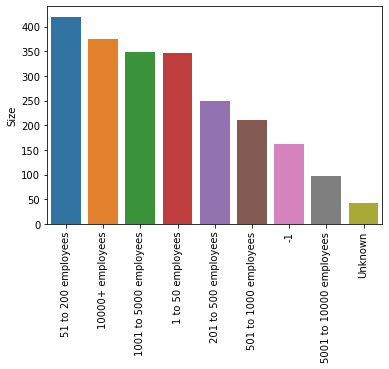

graph for Type of ownership: total = 15


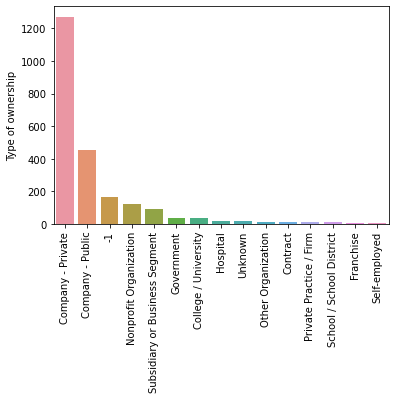

graph for Industry: total = 89


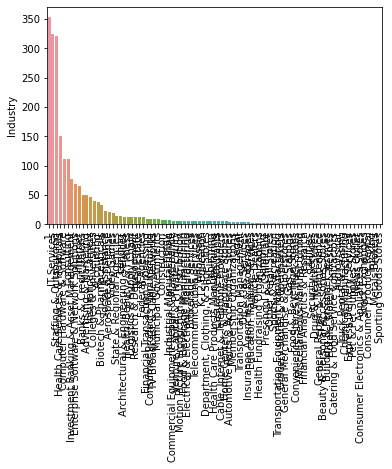

graph for Sector: total = 25


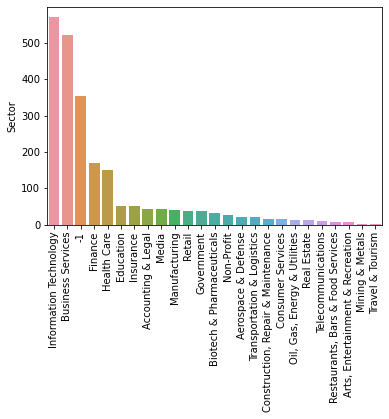

graph for Revenue: total = 14


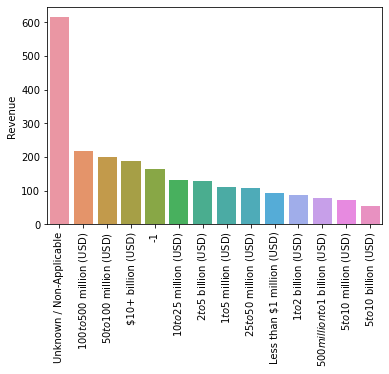

graph for company_txt: total = 1504


In [ ]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 10


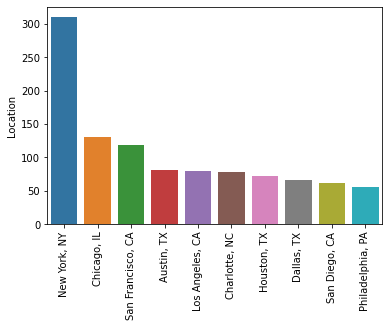

graph for Headquarters: total = 10


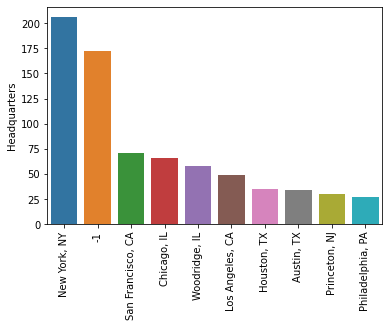

graph for company_txt: total = 10


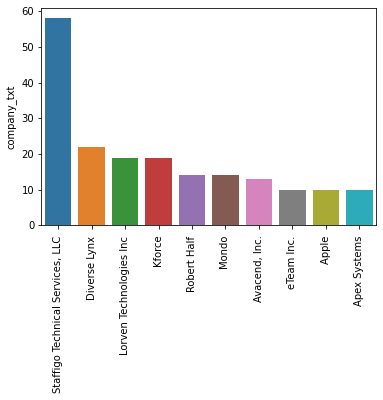

In [192]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:10]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [200]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          68.200000
               na          71.009070
               senior      71.776860
data analyst   jr          60.437500
               na          71.727829
               senior      75.452113
data scientist na          63.166667
               senior      84.500000

In [201]:
pd.pivot_table(df,index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WA        data analyst     63.558140
          analyst          69.900000
VA        data analyst     64.166667
          analyst          66.888889
UT        data scientist   36.500000
          data analyst     37.129630
          analyst          39.900000
TX        data analyst     56.825279
          analyst          63.491803
          data scientist   38.666667
SC        data analyst     68.333333
PA        data analyst     61.739130
          analyst          61.681818
OH        data scientist   40.000000
          data analyst     45.000000
          analyst          47.428571
NY        data scientist   72.000000
          data analyst     69.904167
          analyst          74.912621
NJ        data analyst     74.129310
          data scientist   66.500000
          analyst          70.814815
NC        data analyst     68.634921
          analyst          66.888889
KS        data analyst     51.500000
          analyst          51.500000
IN        data analyst     47.500000
IL        data scientist   95.250000
          data analyst     76.934615
          analyst          82.843750
GA        data analyst     44.000000
FL        analyst          50.750000
          data analyst     52.315789
DE        data analyst     55.642857
          analyst          66.875000
CO        data analyst     71.549180
          analyst          78.296296
CA        data scientist  119.166667
          data analyst     90.779234
          analyst          78.539370
Arapahoe  analyst          62.000000
          data analyst     73.714286
AZ        data analyst     70.753521
          analyst          70.884615

In [203]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [204]:
pd.pivot_table(df,index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WA        data analyst            43
          analyst                 10
VA        data analyst            30
          analyst                 18
UT        data scientist           1
          data analyst            27
          analyst                  5
TX        data analyst           269
          analyst                122
          data scientist           3
SC        data analyst             3
PA        data analyst            92
          analyst                 22
OH        data scientist           2
          data analyst            26
          analyst                  7
NY        data scientist           2
          data analyst           240
          analyst                103
NJ        data analyst            58
          data scientist           1
          analyst                 27
NC        data analyst            63
          analyst                 27
KS        data analyst             2
          analyst                  1
IN        data analyst            23
IL        data scientist           2
          data analyst           130
          analyst                 32
GA        data analyst             4
FL        analyst                  8
          data analyst            19
DE        data analyst             7
          analyst                  4
CO        data analyst            61
          analyst                 27
CA        data scientist           3
          data analyst           496
          analyst                127
Arapahoe  analyst                  1
          data analyst             7
AZ        data analyst            71
          analyst                 26

In [205]:
pd.pivot_table(df[df.job_simp == 'data analyst'],index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,90.779234
IL,76.934615
NJ,74.129310
Arapahoe,73.714286
CO,71.549180
AZ,70.753521
NY,69.904167
NC,68.634921
SC,68.333333


In [206]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'excel_yn', 'power_bi_yn', 'spark_yn', 'aws_yn',
       'job_simp', 'seniority', 'description_len', 'number_comp'],
      dtype='object')

In [207]:
#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, power_bi_yn, description_len, Type of ownership

In [237]:
df_pivots = df[['Rating', 'Industry', 'Revenue', 'number_comp','hourly', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'power_bi_yn', 'description_len', 'Sector','avg_salary',]]

In [238]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))  


Rating
        avg_salary
Rating            
 2.2     95.666667
 4.4     82.366667
 1.7     82.000000
 1.6     80.000000
 2.0     79.750000
 2.4     77.350000
 4.5     76.925532
 3.2     76.901099
 2.1     76.625000
 4.0     76.232558
 3.9     75.210714
 4.6     74.760870
 4.1     74.424370
 2.3     73.888889
 4.2     73.159574
 4.8     72.913793
-1.0     72.867647
 2.5     72.781250
 3.4     72.158416
 5.0     72.125954
 3.7     71.803030
 3.3     71.440367
 4.7     71.000000
 3.0     70.982456
 3.8     69.534615
 3.6     69.207407
 3.1     68.801471
 4.3     68.172727
 2.8     67.825581
 3.5     67.240000
 2.9     66.887500
 2.6     65.821429
 1.0     64.250000
 2.7     62.780000
 4.9     61.470588
 1.9     61.250000
 1.8     58.250000
Industry
                                           avg_salary
Industry                                             
Drug & Health Stores                        95.250000
Education Training Services                 92.833333
Health Care Products Manufa

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [231]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),65,22
$1 to $5 million (USD),82,29
$10 to $25 million (USD),94,38
$10+ billion (USD),133,56
$100 to $500 million (USD),158,60
$2 to $5 billion (USD),97,32
$25 to $50 million (USD),76,33
$5 to $10 billion (USD),36,20
$5 to $10 million (USD),57,15


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()